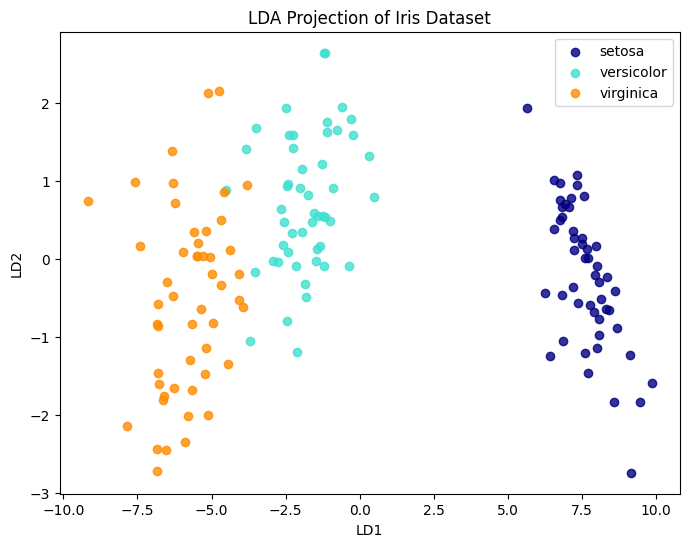

In [ ]:
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()  
X = iris.data  # Features
y = iris.target  # Target classes
target_names = iris.target_names  # Class names

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Plot results
plt.figure(figsize=(8,6))
colors = ['navy', 'turquoise', 'darkorange']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], 
                X_lda[y == i, 1],
                alpha=0.8, 
                color=color,
                label=target_name)

plt.title('LDA Projection of Iris Dataset')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()


Accuracy: 1.00


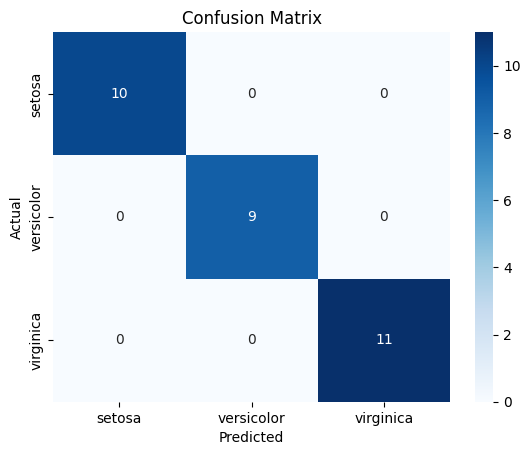

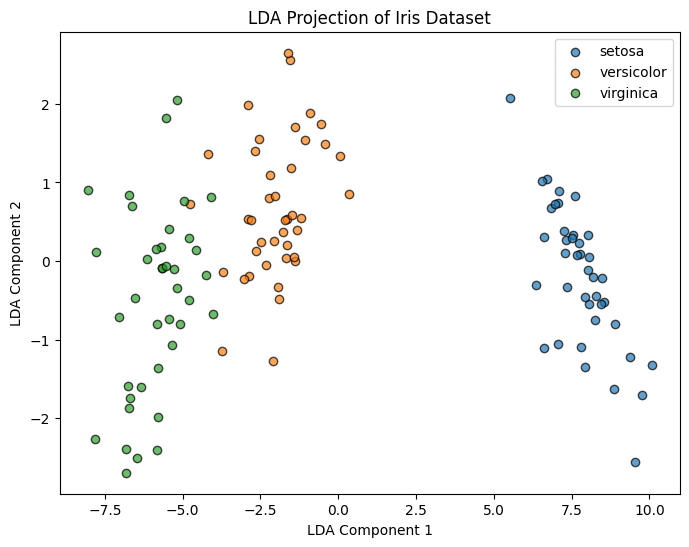

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2 components
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train a classifier (Logistic Regression)
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_lda)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualizing LDA components
plt.figure(figsize=(8,6))
for label, color in zip(range(3), ['r', 'g', 'b']):
    plt.scatter(X_train_lda[y_train == label, 0], X_train_lda[y_train == label, 1], label=iris.target_names[label], alpha=0.7, edgecolors='k')

plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA Projection of Iris Dataset")
plt.legend()
plt.show()